In [1]:
import requests
import random
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm_notebook
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (14,6)

import amazonwebscrape as scraper

In [2]:
FILENAME = "AmazonSearch_phone.json"
scraper.get_all_data_info(FILENAME, keys=None)

  0%|          | 0/444 [00:00<?, ?it/s]

Attempt: 1 | Number of failures: 88 | Retrying


  0%|          | 0/88 [00:00<?, ?it/s]

Attempt: 2 | Number of failures: 36 | Retrying


  0%|          | 0/36 [00:00<?, ?it/s]

Attempt: 3 | Number of failures: 21 | Retrying


  0%|          | 0/21 [00:00<?, ?it/s]

Attempt: 4 | Number of failures: 18 | Retrying


  0%|          | 0/18 [00:00<?, ?it/s]

Attempt: 5 | Number of failures: 17 | Retrying
Number of failures: 17
DONE


In [3]:
df = pd.read_json(FILENAME, orient='index')
df.head()

,itemLink,name,image,reviewStars,numberOfReviews,currentPrice,oldPrice,itemInfo
0,https://www.amazon.com/gp/slredirect/picassoRe...,"Samsung Galaxy S21 FE 5G Cell Phone, Factory U...",https://m.media-amazon.com/images/I/61kLsk8Rsl...,4.6 out of 5 stars,"8,067",$699.99,None,"{'Model Name': 'S21 FE', 'Wireless Carrier': '..."
1,https://www.amazon.com/gp/slredirect/picassoRe...,Xperia PRO-I 5G smartphone with 1-inch image s...,https://m.media-amazon.com/images/I/41XydBYdgR...,4.0 out of 5 stars,21,"$1,798.00",None,"{'Brand': 'Sony', 'Camera Lens Description': '..."
2,https://www.amazon.com/Apple-iPhone-512GB-Spac...,"(Renewed Premium) Apple iPhone 11 Pro Max, 512...",https://m.media-amazon.com/images/I/81LmL94PUv...,4.4 out of 5 stars,"2,264",$785.00,None,"{'Model Name': 'IPhone 11 Pro Max', 'Wireless ..."
3,https://www.amazon.com/IS8121-2-Bluetooth-Cord...,VTECH IS8121-2 Super Long Range up to 2300 Fee...,https://m.media-amazon.com/images/I/81bA-cowEx...,4.2 out of 5 stars,998,$60.11,$69.95,"{'Brand': 'VTech', 'Color': 'Silver/Black', 'T..."
4,https://www.amazon.com/Samsung-Unlocked-Smartp...,SAMSUNG Galaxy S20 FE 5G Factory Unlocked Andr...,https://m.media-amazon.com/images/I/71ouXIR8m+...,4.6 out of 5 stars,"8,067",$599.99,$699.99,"{'Model Name': 'S20FE', 'Wireless Carrier': 'U..."


In [4]:
df['currentPrice_float'] = df.currentPrice.apply(scraper.get_price_from_string)
df['oldPrice_float'] = df.oldPrice.apply(scraper.get_price_from_string)
df['reviewStars_float'] = df.reviewStars.apply(scraper.get_review_score)
df['numberOfReviews_float'] = df.numberOfReviews.apply(scraper.get_number_of_reviews)
df['brand'] = df.itemInfo.apply(scraper.get_brand)

In [5]:
df_float = df.iloc[:, -5:]
df_float.head()

,currentPrice_float,oldPrice_float,reviewStars_float,numberOfReviews_float,brand
0,699.99,NaN,4.6,8067.0,Samsung Electronics
1,1798.00,NaN,4.0,21.0,Sony
2,785.00,NaN,4.4,2264.0,Apple
3,60.11,69.95,4.2,998.0,VTech
4,599.99,699.99,4.6,8067.0,Samsung Electronics


In [6]:
df_by_brand = df_float.groupby('brand', as_index=False)

In [7]:
def get_popular_brand(n=10):
    sum_by_brand = df_by_brand.sum()
    sum_reviews = sum_by_brand.sort_values(by="numberOfReviews_float", ascending=False)
    popular_brand = sum_reviews.iloc[:n].brand.to_list()
    
    return popular_brand

In [8]:
popular_brand = get_popular_brand(10)
popular_brand

['Samsung Electronics',
 'Panasonic',
 'Lamicall',
 'Apple',
 'AT&T',
 'IOttie',
 'LISEN',
 'VTech',
 'OMOTON',
 'Motorola']

In [9]:
def is_popular_brand(x):
    return x in popular_brand

In [10]:
df_popular = df_float[df_float.brand.apply(is_popular_brand)]
df_popular.reset_index(drop=True, inplace=True)
print(df_popular.shape)
df_popular.head()

(160, 5)


,currentPrice_float,oldPrice_float,reviewStars_float,numberOfReviews_float,brand
0,699.99,NaN,4.6,8067.0,Samsung Electronics
1,785.00,NaN,4.4,2264.0,Apple
2,60.11,69.95,4.2,998.0,VTech
3,599.99,699.99,4.6,8067.0,Samsung Electronics
4,NaN,NaN,4.4,2828.0,Motorola


In [11]:
df_popular_by_brand = df_popular.groupby("brand", as_index=False)

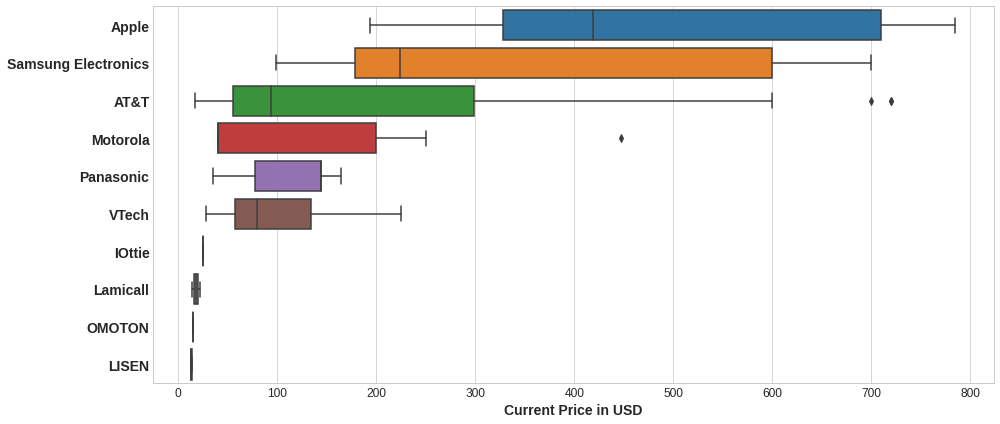

In [12]:
font = {"size":14, "weight":"bold"}
sns.boxplot(data=df_popular, x="currentPrice_float", y="brand", showfliers=True,
            order=df_popular_by_brand.mean().sort_values(by="currentPrice_float", ascending=False).brand)
plt.xlabel("Current Price in USD", fontdict=font)
plt.ylabel(None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

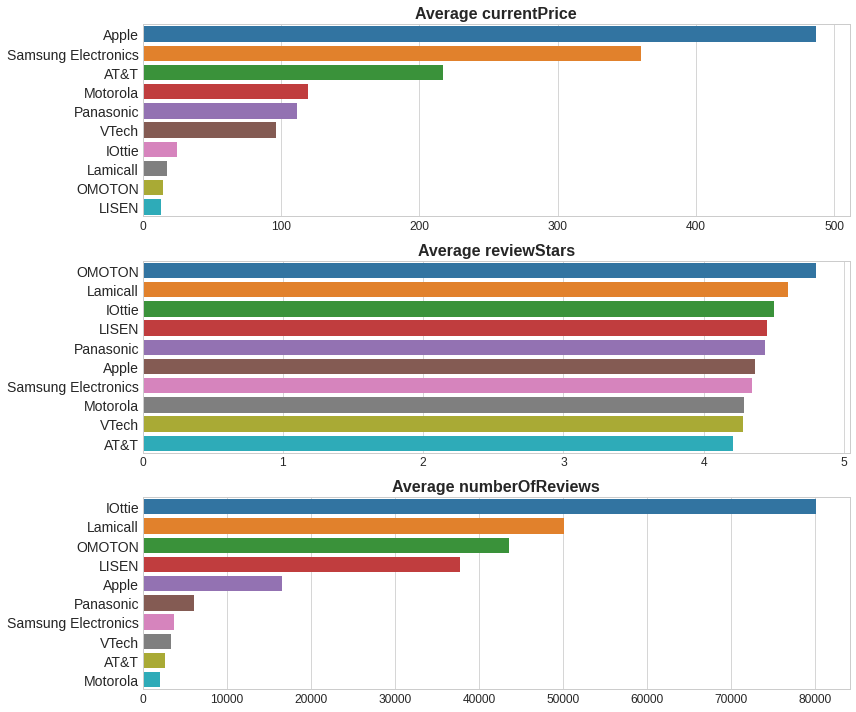

In [13]:
df_popular_mean = df_popular_by_brand.mean()

plt.figure(figsize=(12,10))
cols = ["currentPrice_float", "reviewStars_float", "numberOfReviews_float"]
font = {"size":16, "weight":"bold"}

for i, col in enumerate(cols):
    
    plt.subplot(len(cols), 1, i+1)
    sns.barplot(data=df_popular_mean, x=col, y="brand",
                order=df_popular_mean.sort_values(by=col, ascending=False).brand)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.title("Average "+col.split("_")[0], fontdict=font)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()